<a href="https://colab.research.google.com/github/ujjawalsingh10/Pytorch-Deep-Learning/blob/main/03_Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Import Pytorch
import torch
from torch import nn

## Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms

## 1. Getting a Dataset

In [2]:
## Setting training data
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None,
    download = True
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    transform = transforms.ToTensor(),
    target_transform = None,
    download = True
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.1MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.76MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.67MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
## See first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_idx = train_data.class_to_idx
class_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
## CHeck the shape
image.shape, label

(torch.Size([1, 28, 28]), 9)

## 1.2 Visualize the data

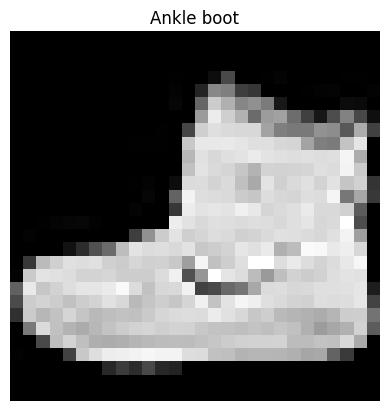

In [8]:
import matplotlib.pyplot as plt

plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
plt.show()

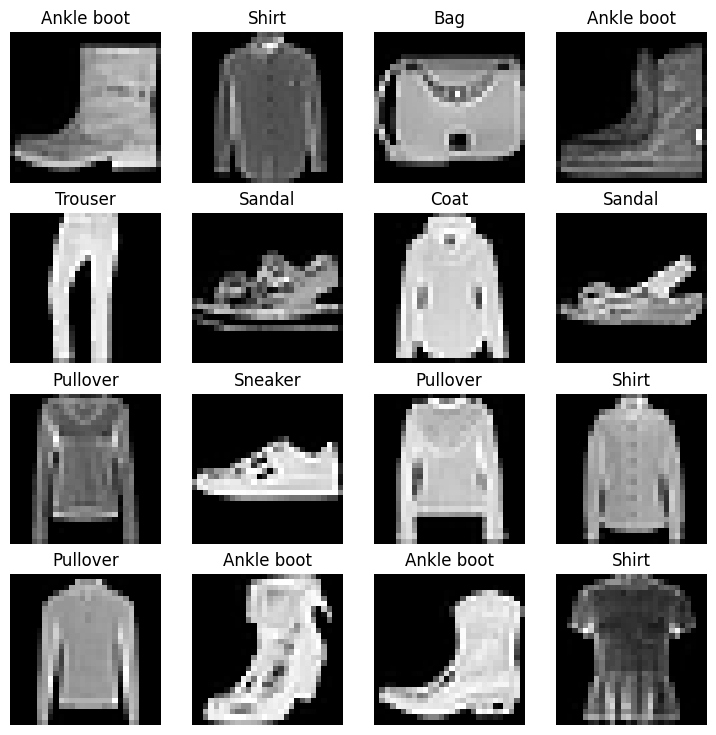

In [9]:
## PLot more images
torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows, cols = 4,4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False)
plt.show()

## 2. Prepare Dataloader
Our data is in the form of pytorch datasets.
Dataloader turns our dataset into a python iterable

Batching gives our NN more chance to update its gradient per epoch

In [10]:
from torch.utils.data import DataLoader

## setting up batch size hyperparameter
BATCH_SIZE = 32

## TUrn datasets into iterables(batches)
train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7903e9da64d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7903e9c0d2d0>)

In [11]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [12]:
60000/32

1875.0

In [13]:
## Checking whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [14]:
len(train_features_batch)

32

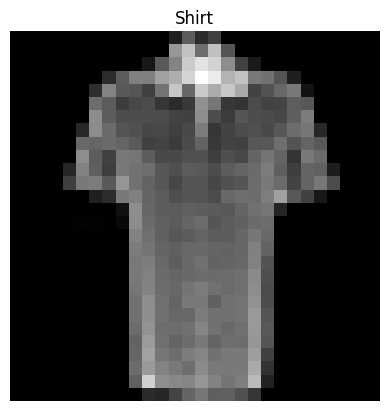

In [15]:
## Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)
plt.show()

## 3. Model 0 : Building a baseline model

In [16]:
## Create a flatten layer
flatten_model = nn.Flatten()

## get a single sample
x = train_features_batch[0]

##flatten the sample
output = flatten_model(x)
output.shape, x.shape

(torch.Size([1, 784]), torch.Size([1, 28, 28]))

In [17]:
28 * 28

784

In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape, output_shape, hidden_units):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features = hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_stack(x)


In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [20]:
torch.manual_seed(42)

#setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape= 784,
    hidden_units = 10,
    output_shape = len(class_names)
    ).to(device)

model_0

FashionMNISTModelV0(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1,1,28,28]).to(device)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [22]:
model_0.state_dict()

OrderedDict([('linear_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('linear_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('linear_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, 

### 3.1 Setup Loss, Optimizer and evaluation metrics

In [23]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('Already exists. Skipping download...')
else:
  print('Downloading.....')
  response = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_functions.py', 'w') as f:
    f.write(response.text)
    print('Downloaded!')


Downloading.....
Downloaded!


In [24]:
!ls

data  helper_functions.py  sample_data


In [25]:
import importlib
import helper_functions
importlib.reload(helper_functions)

from helper_functions import accuracy_fn

In [26]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

### 3.2 Function to time our experiments

In [27]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device = None):
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time

In [28]:
start_time = timer()

## Code

end_time = timer()
print_train_time(start = start_time,
                 end = end_time,
                 device = device)

Train time on cpu: 0.000 seconds


3.8735000003953246e-05

### 3.3 Creating a training loop and training a model on batches

In [29]:
## tqdm bar
from tqdm.auto import tqdm

## Setting the seed and  start timer
torch.manual_seed(42)
train_time_start = timer()

epochs = 3

## Creating the training loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n -------")

  ## Training
  train_loss = 0

  ## Loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()

    ## Forward pass
    y_pred = model_0(X)

    ## Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    ## Optimizer zero grad
    optimizer.zero_grad()

    ## loss backward
    loss.backward()

    ## optimizer step
    optimizer.step()

    ## printing whats happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")

  ## dividing the total train loss by length of the train dataloader
  train_loss /= len(train_dataloader)

  ## Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      ## Forward pass
      test_pred = model_0(X_test)

      ## calc loss
      test_loss += loss_fn(test_pred, y_test)

      ## calc accuracy
      test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

    ## calculate the test loss avg per batch
    test_loss /= len(test_dataloader)

    ## calculate the test accuracy avg per batch
    test_acc /= len(test_dataloader)

  ## print out whats happening
  print(f"Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

## training time calc
train_time_end = timer()
total_train_time_model_0 = print_train_time(start = train_time_start,
                                        end = train_time_end,
                                        device = str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 -------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss: 0.5904 | Test loss: 0.5095 | Test acc: 82.0387
Epoch: 1
 -------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss: 0.4763 | Test loss: 0.4799 | Test acc: 83.1969
Epoch: 2
 -------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss: 0.4550 | Test loss: 0.4766 | Test acc: 83.4265
Train time on cpu: 30.577 seconds


## 4. Make predictions and make model 0 results

In [30]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(test_dataloader):
      X,y = X.to(device), y.to(device)
      ## forward pass
      preds = model(X)

      ## accumulating loss and acc
      loss += loss_fn(preds, y)
      acc += accuracy_fn(y, preds.argmax(dim = 1))

    ## average loss
    loss /= len(test_dataloader)

    ## average accuracy
    acc /= len(test_dataloader)

  return {'model_name' : model.__class__.__name__,
          'model_loss' : loss.item(),
          'model_acc' : acc
          }

In [31]:
model_0_results = eval_model(model_0,
                             test_dataloader,
                             loss_fn,
                             accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic code

In [32]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 6 Model 1: Building a better model with non-linearity

In [33]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape : int,
               output_shape: int,
               hidden_units: int):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features=output_shape)
    )

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_stack(x)

In [34]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

In [35]:
model_1

FashionMNISTModelV1(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 6.1 loss and optimizer

In [36]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

### 6.2 Functionizing training and testing loop

In [37]:
def train_step(model: torch.nn.Module,
               train_dataloader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  train_loss, train_acc = 0, 0

  ## putting model into training mode
  model.train()

  ## Loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    ## putting data on target device
    X, y = X.to(device), y.to(device)

    ## Forward pass
    y_pred = model(X)

    ## Calculate the loss and acc (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y, y_pred.argmax(dim = 1))

    ## Optimizer zero grad
    optimizer.zero_grad()

    ## loss backward
    loss.backward()

    ## optimizer step
    optimizer.step()

  ## dividing the total train loss by length of the train dataloader
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)
  print(f"Train loss: {train_loss:.5f} | Train acc : {train_acc:.2f}%")


In [38]:
def test_step(model : torch.nn.Module,
              test_dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      ## putting on target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      ## Forward pass
      test_pred = model(X_test)

      ## calc loss
      test_loss += loss_fn(test_pred, y_test)

      ## calc accuracy
      test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

    ## calculate the test loss avg per batch
    test_loss /= len(test_dataloader)

    ## calculate the test accuracy avg per batch
    test_acc /= len(test_dataloader)

    print(f"Test loss: {test_loss:.5f} | Test acc : {test_acc:.2f}%\n")

In [39]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)

train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n -------")
  train_step(model_1,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)
  test_step(model_1,
            test_dataloader,
            loss_fn,
            accuracy_fn,
            device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                        end = train_time_end_on_gpu,
                                        device = str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 -------
Train loss: 0.66768 | Train acc : 75.88%
Test loss: 0.50092 | Test acc : 82.09%

Epoch: 1
 -------
Train loss: 0.48344 | Train acc : 82.77%
Test loss: 0.48896 | Test acc : 82.69%

Epoch: 2
 -------
Train loss: 0.44955 | Train acc : 83.87%
Test loss: 0.48580 | Test acc : 82.89%

Train time on cpu: 32.492 seconds


In [40]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn, device = device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.48580455780029297,
 'model_acc': 82.8873801916933}

## Model 2: Building a CNN

In [41]:
class FashionMNISTModelV2(nn.Module):
  """
  MOdel architecture that replicates the TinyVgg
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv1_block = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv2_block = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features =  hidden_units * 7 * 7,
                  out_features = output_shape),
  )

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    x = self.conv1_block(x)
    # print(f"Output of conv_block_1: {x.shape}")
    x = self.conv2_block(x)
    # print(f"Output of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output of classifier: {x.shape}")
    return x

In [42]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1, ## in conv2d layer input shape is the number of color channels in the image
                            hidden_units = 10,
                            output_shape = len(class_names)).to(device)

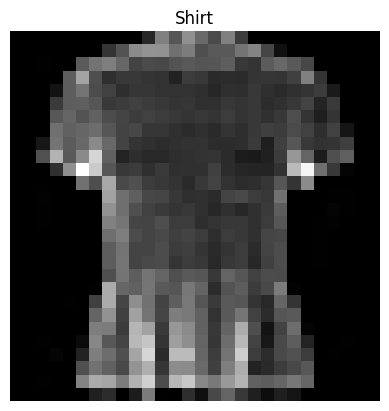

In [43]:
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(label = class_names[label])
plt.axis('off');

In [44]:
rand_image_tensor = torch.randn([1,28,28])
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [45]:
model_2(image.unsqueeze(0))

tensor([[ 0.0300, -0.0610,  0.0485, -0.0278, -0.0125,  0.0172, -0.0056, -0.0121,
          0.0243,  0.0095]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through nn.Conv2d()

In [46]:
torch.manual_seed(42)

## create a batch of images
images = torch.randn(size = (32,3,64,64))
test_image = images[0]

print(f"image batch shape: {images.shape}")
print(f"single image shape: {test_image.shape}")
# print(f"single image pixel values: {test_image}")

image batch shape: torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])


In [47]:
# model_2.state_dict()

In [48]:
torch.manual_seed(42)
# create a single Conv2D layer
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = 3,
                       stride = 1,
                       padding = 1)

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping thorugh nn.MaxPool2d()

In [49]:
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

max_pool_output = max_pool_layer(conv_output)
max_pool_output.shape

torch.Size([10, 32, 32])

In [50]:
torch.manual_seed(42)

random_tensor = torch.randn([1,2,2])

max_pool_layer = nn.MaxPool2d(kernel_size=2)
random_tensor, max_pool_layer(random_tensor)

(tensor([[[0.3367, 0.1288],
          [0.2345, 0.2303]]]),
 tensor([[[0.3367]]]))

### 7.3 Setup a loss and optimizer

In [51]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

### 7.4 training and testing `model_2`

In [52]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)

train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n -------")
  train_step(model_2,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)
  test_step(model_2,
            test_dataloader,
            loss_fn,
            accuracy_fn,
            device)

train_time_end_on_gpu = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_on_gpu,
                                        end = train_time_end_on_gpu,
                                        device = str(next(model_2.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 -------
Train loss: 0.59518 | Train acc : 78.38%
Test loss: 0.39500 | Test acc : 85.99%

Epoch: 1
 -------
Train loss: 0.36536 | Train acc : 86.90%
Test loss: 0.35244 | Test acc : 86.91%

Epoch: 2
 -------
Train loss: 0.32588 | Train acc : 88.13%
Test loss: 0.32719 | Test acc : 88.07%

Train time on cpu: 178.258 seconds


In [53]:
## getting model_2 results
model_2_results = eval_model(model_2, test_dataloader, loss_fn, accuracy_fn, device = device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## 8. Compare model results and training time

In [54]:
import pandas as pd
compare_results = pd.DataFrame(data = [model_0_results,
                                       model_1_results,
                                       model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.485805,82.887380
2,FashionMNISTModelV2,0.327190,88.069089


In [55]:
# Add training time to results comparison
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,30.576549
1,FashionMNISTModelV1,0.485805,82.887380,32.492212
2,FashionMNISTModelV2,0.327190,88.069089,178.257794


<Axes: xlabel='model_name', ylabel='model_acc'>

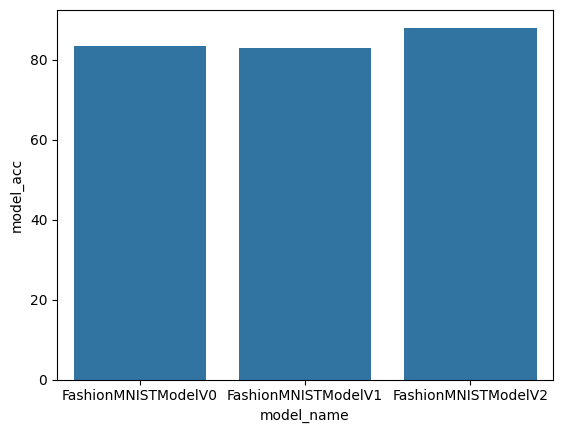

In [56]:
# visualize our model results
import seaborn as sns
sns.barplot(data = compare_results,
            x = 'model_name',
            y = 'model_acc')

In [57]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,30.576549
1,FashionMNISTModelV1,0.485805,82.887380,32.492212
2,FashionMNISTModelV2,0.327190,88.069089,178.257794


## 9. Make and evaluate random predictions with best model

In [58]:
def make_predictions(model: torch.nn.Module,
               data: list,
               device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      ## forward pass (raw logits)
      pred_logit = model(sample)

      ## get prediction probabilties
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      ## get pred_prob off GPU
      pred_probs.append(pred_prob.cpu())

    ## stack the pred probs to turn list into tensor
    return torch.stack(pred_probs)




In [59]:
import random
# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

## view the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Coat')

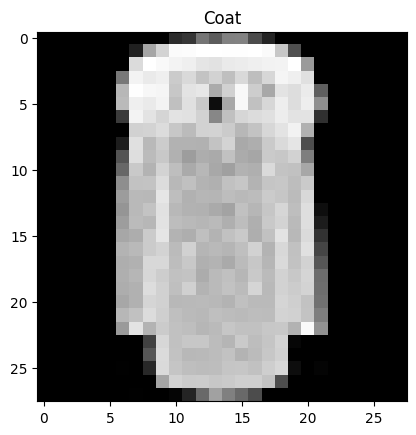

In [60]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [61]:
## Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# view two pred probs
pred_probs[:2]

tensor([[6.5147e-02, 4.1013e-03, 2.4761e-02, 2.1365e-01, 3.4138e-01, 4.0476e-05,
         3.4749e-01, 9.1335e-05, 3.3315e-03, 1.2465e-05],
        [4.1433e-04, 1.8838e-06, 4.3291e-04, 2.6825e-05, 6.3500e-04, 6.1420e-08,
         2.7486e-03, 1.1348e-05, 9.9572e-01, 9.5314e-06]])

In [62]:
# convert pred prob to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 8, 1, 1, 3, 4, 3, 3, 6])

In [63]:
test_labels

[4, 8, 1, 1, 3, 4, 0, 4, 6]

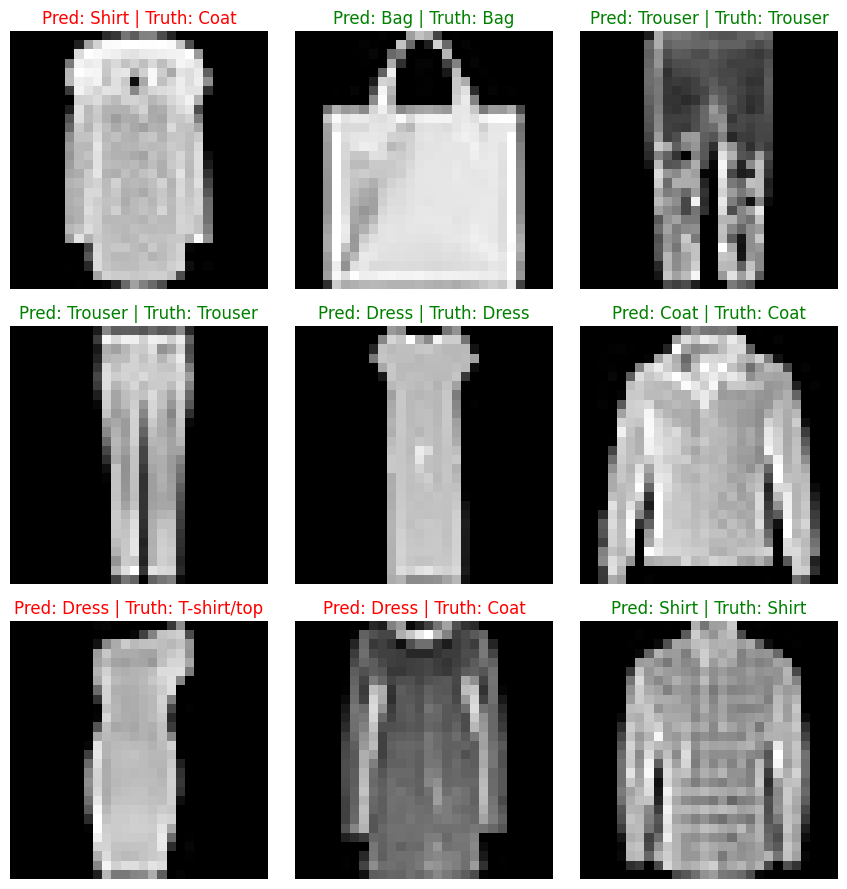

In [64]:
## plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap = 'gray')

  ## get prediction label
  pred_label = class_names[pred_classes[i]]

  ## get the truth label
  truth_label = class_names[test_labels[i]]

  ## creating title for plots
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text, color = 'green')
  else:
    plt.title(title_text, color = 'red')

  plt.axis('off')
  plt.tight_layout()

## 10. Making a Confusion matrix

In [65]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(test_dataloader):
    X_test, y_test = X_test.to(device), y_test.to(device)

    ## forward pass
    test_pred = model_2(X_test)

    y_preds.append(test_pred.argmax(dim=1).cpu())

y_pred_tensors = torch.cat(y_preds) ## merges all the batches into a single tensor
y_pred_tensors[:10]

  0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [66]:
try:
  import torchmetrics, mlxtend
except:
  !pip install -q torchmetrics
  !pip install mlxtend
  import torchmetrics, mlxtend
  print(f"torchmetrics version: {torchmetrics.__version__}")
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 571.1/664.8 MB 94.0 MB/s eta 0:00:01
ERROR: Operation cancelled by user


ModuleNotFoundError: No module named 'torchmetrics'

In [67]:
# from torchmetrics import ConfusionMatrix
# import mlextend

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true = test_data.targets,
                      y_pred = y_pred_tensors)
cm

array([[852,   2,  11,  30,   3,   1,  94,   0,   7,   0],
       [  4, 972,   0,  15,   3,   0,   5,   0,   1,   0],
       [ 12,   1, 748,  11, 129,   0,  97,   0,   2,   0],
       [ 22,   4,   9, 913,  20,   0,  30,   0,   2,   0],
       [  2,   2,  46,  40, 824,   0,  86,   0,   0,   0],
       [  1,   0,   0,   2,   0, 977,   0,  14,   1,   5],
       [150,   0,  55,  33,  83,   0, 666,   0,  13,   0],
       [  0,   0,   0,   0,   0,  22,   0, 946,   0,  32],
       [  3,   1,   3,   8,   3,   4,  16,   5, 957,   0],
       [  0,   0,   0,   1,   0,  10,   1,  37,   1, 950]])

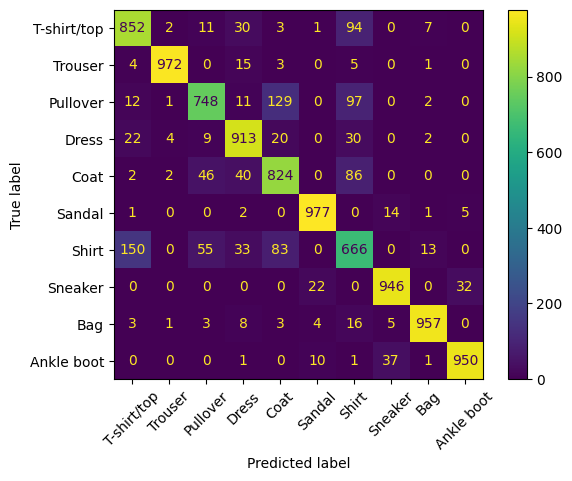

In [68]:
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.xticks(rotation = 45);

## 11. Saving and loading the model

In [69]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = 'fashion_mnist_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

print(f"model save path: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

model save path: models/fashion_mnist_model_2.pth


In [71]:
## creating a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units = 10,
                                     output_shape = len(class_names))

loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

<ipython-input-71-409293549133>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [72]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [73]:
torch.manual_seed(42)

loaded_model_2.eval()

loaded_model_2_results = eval_model(model = loaded_model_2,
                                    data_loader = test_dataloader,
                                    loss_fn = loss_fn,
                                    accuracy_fn = accuracy_fn,
                                    device = device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [74]:
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}